### Задача.

Телеком: исследование оттока клиентов

DESCRIPTION

Пока создаётся модель прогнозирования оттока клиентов, отдел маркетинга «Ниединогоразрыва.ком» приступает к проработке способов их удержания. Вам предстоит собрать нужную для этого информацию.

Сравните распределения величин ежемесячных платежей (MonthlyCharges) всех действующих клиентов и тех, кто ушёл. Для каждой группы посчитайте статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей. Постройте гистограммы распределения.

Сравните поведение клиентов этих двух групп. Для каждой постройте два любых графика, изображающих:

долю пользователей телефонной связи;
долю интернет-пользователей.

### Загрузка и предобработка.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/Users/apple/Downloads/final_provider/'
#path = '/datasets/final_provider/

In [3]:
contract = pd.read_csv(path + 'contract.csv')

Создадим справочник для замены значений:

In [4]:
to_bool = {'Yes': 1, 'No': 0}

И применим его на параметрах Yes/No:

In [5]:
contract.PaperlessBilling = contract.PaperlessBilling.map(to_bool) #to 0_1

In [6]:
contract = contract[contract['TotalCharges']!=' ']

In [7]:
contract.TotalCharges = pd.to_numeric(contract.TotalCharges)

In [8]:
contract.BeginDate = pd.to_datetime(contract.BeginDate)

Введем целевой парметр Churn (1 - "Ушел", 0 - "Остался") :

In [9]:
def make_target_churn (contract):
    return (0 if contract.EndDate == 'No' else 1)

contract['Churn'] = contract.apply(make_target_churn, axis = 1)

Для расчета длительности контрактов обработаем даты.

In [10]:
contract.loc[contract.EndDate == 'No', 'EndDate'] = '2020-02-01'

In [11]:
contract.EndDate = pd.to_datetime(contract.EndDate)

Введем новый параметр ActivMonth, в кототый запишем длительность контрактов в месяцах.

In [12]:
contract['ActivMonth'] = ((contract.EndDate - contract.BeginDate)/np.timedelta64(1,'M'))

In [13]:
contract['ActivMonth'] =contract.ActivMonth.round(decimals=0).astype(np.int64)

In [14]:
personal = pd.read_csv(path + 'personal.csv')

In [15]:
personal.Partner = personal.Partner.map(to_bool)
personal.Dependents = personal.Dependents.map(to_bool)

Создадим финальный датафрейм на основе контрактов и добавим в него информацию о пользователе:

In [16]:
final_df = contract.merge(personal, on='customerID', how='left', 
                          #suffixes=('_con', '_pers')
                         )

In [17]:
internet = pd.read_csv(path + 'internet.csv')

In [18]:
internet['internet_user']='Yes'

Добавим сведения об интернете в финальный датафрейм:

In [19]:
final_df = final_df.merge(internet, on='customerID', how='left', 
                          #suffixes=('_con', '_pers')
                         )

In [20]:
phone = pd.read_csv(path + 'phone.csv')

In [21]:
phone['phone_user']='Yes'

In [22]:
final_df = final_df.merge(phone, on='customerID', how='left', 
                          #suffixes=('_con', '_pers')
                         )

Заполним возникшие пропускки после слияния опций

In [23]:
final_df = final_df.fillna('No')

In [24]:
col_list = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']
for col in col_list:
    final_df[col] = final_df[col].map(to_bool) #to 0_1
    

In [25]:
final_df[final_df['InternetService']=='No'].InternetService.value_counts()

No    1520
Name: InternetService, dtype: int64

Обнаружили 1520 пользователей которые отсутствовали в файле internet и были загружены из phone. Это пользователи телефонии.

In [26]:
final_df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ActivMonth,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,internet_user,MultipleLines,phone_user
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,29.85,0,1,...,DSL,0,1,0,0,0,0,Yes,0,No
1,5575-GNVDE,2017-04-01,2020-02-01,One year,0,Mailed check,56.95,1889.50,0,34,...,DSL,1,0,1,0,0,0,Yes,0,Yes
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15,1,2,...,DSL,1,1,0,0,0,0,Yes,0,Yes
3,7795-CFOCW,2016-05-01,2020-02-01,One year,0,Bank transfer (automatic),42.30,1840.75,0,45,...,DSL,1,0,1,1,0,0,Yes,0,No
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,151.65,1,2,...,Fiber optic,0,0,0,0,0,0,Yes,0,Yes
5,9305-CDSKC,2019-03-01,2019-11-01,Month-to-month,1,Electronic check,99.65,820.50,1,8,...,Fiber optic,0,0,1,0,1,1,Yes,1,Yes
6,1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,22,...,Fiber optic,0,1,0,0,1,0,Yes,1,Yes
7,6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,0,Mailed check,29.75,301.90,0,10,...,DSL,1,0,0,0,0,0,Yes,0,No
8,7892-POOKP,2017-07-01,2019-11-01,Month-to-month,1,Electronic check,104.80,3046.05,1,28,...,Fiber optic,0,0,1,1,1,1,Yes,1,Yes
9,6388-TABGU,2014-12-01,2020-02-01,One year,0,Bank transfer (automatic),56.15,3487.95,0,62,...,DSL,1,1,0,0,0,0,Yes,0,Yes


В результате предобработки имеем датафрейм без пропусков, который построен на основе контрактов и включил в себя инфорацию о пользоваателе  и сведения об опциях услуг  телефонии и интернета.

### Анализ распределения длительности контракта

Проверим распределение целевого признакая.

In [27]:
final_df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Признак распределен неравномерно, перевес в сторону отрицательного класса. Необходимо учесть это при обучении модели.

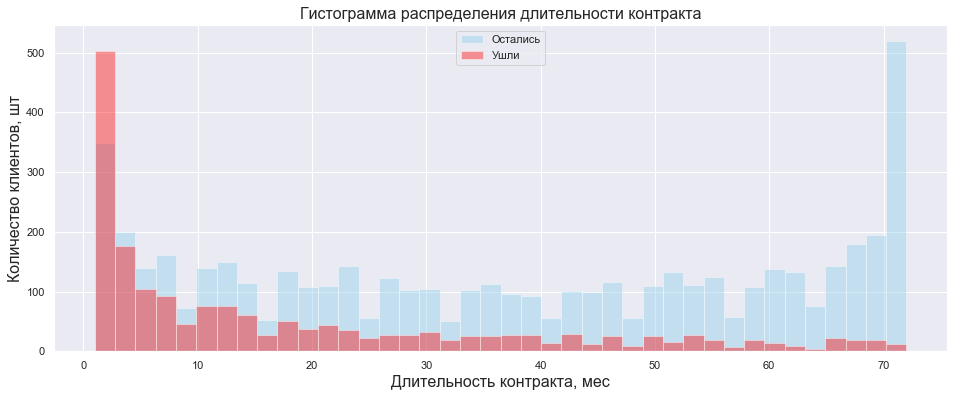

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

f, ax = plt.subplots(1, 1, figsize = (16,6))

sns.distplot( final_df[final_df.Churn == 0].ActivMonth ,kde=False, color="skyblue", label="Остались", bins =40)
sns.distplot( final_df[final_df.Churn == 1].ActivMonth,kde=False, color="red", label="Ушли",bins =40)
ax.legend()
plt.xlabel("Длительность контракта, мес", fontsize=16)  
plt.ylabel("Количество клиентов, шт", fontsize=16)
plt.title('Гистограмма распределения длительности контракта', fontsize=16)
plt.show()

Видим, что бегунки сосредоточены среди новых клиентов. В первые два месяца большая часть новых клиентов уходит.  

### Анализ распределения величин ежемесячных платежей

In [29]:
final_df.MonthlyCharges.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [30]:
final_df[final_df.Churn == 1].MonthlyCharges.describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

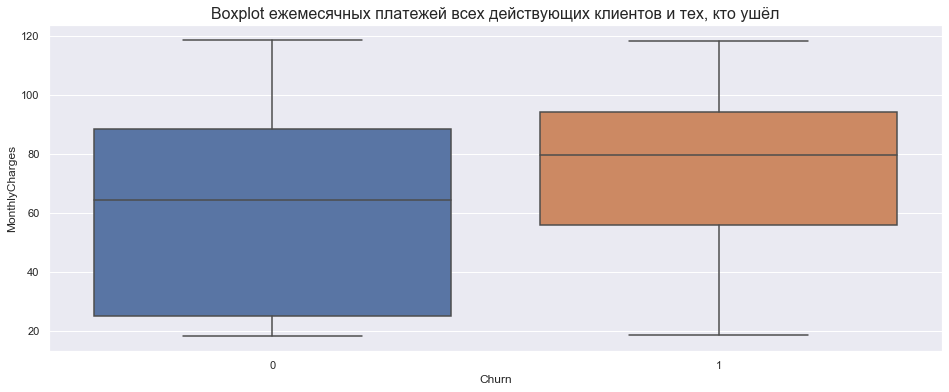

In [31]:
f, ax = plt.subplots(1, 1, figsize = (16,6))
ax = sns.boxplot(x="Churn", y="MonthlyCharges", data=final_df)
plt.title('Boxplot ежемесячных платежей всех действующих клиентов и тех, кто ушёл', fontsize=16)
plt.show()


Среднее и медиана платежей выше у тех, кто ушел.

В диапазоне платежей 70-110 у.е. клиенты уходят чаще.

In [103]:
final_df.phone_user.value_counts()

Yes    6352
No      680
Name: phone_user, dtype: int64

Для каждой постройте два любых графика, изображающих:
долю пользователей телефонной связи; долю интернет-пользователей.

In [85]:
final_df.internet_user.value_counts()

Yes    5512
No     1520
Name: internet_user, dtype: int64

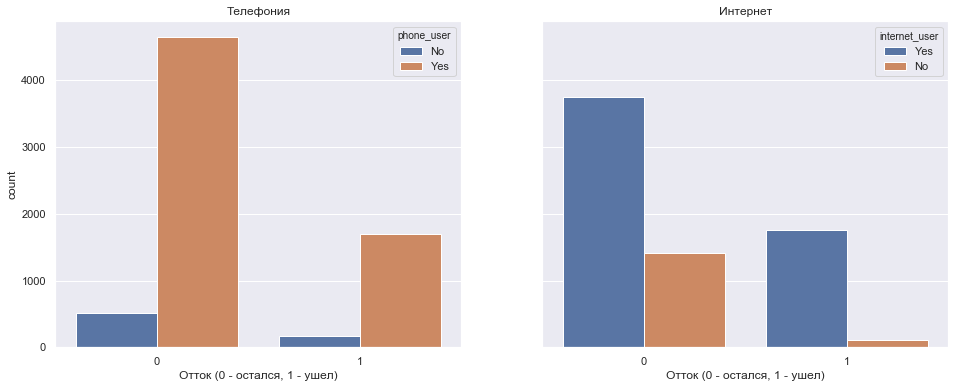

In [125]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize = (16,6))
#fig.suptitle('Churn')
g1 = sns.countplot(x='Churn',
                  hue='phone_user', data=final_df, ax=ax1, )
g1.set_title('Телефония')
g2 = sns.countplot(x='Churn',
                  hue='internet_user', data=final_df, ax=ax2, )
g2.set_title('Интернет')
g1.set_xlabel('Отток (0 - остался, 1 - ушел)')
g2.set_xlabel('Отток (0 - остался, 1 - ушел)')
g2.set_ylabel('')
plt.show()